### Choosing the Right Metric


<center>
    <img src = 'images/uci_biz.png'/>
</center>


This module introduced both the K Nearest Neighbors model as well as a variety of different metrics for classification.  It is important to select and understand the appropriate metric for your task.  This exercise is meant to get practice considering the difference between these new classification metrics and accompanying evaluation tools. Specifically, explore datasets related to business from the UCI Machine Learning Repository [here](https://archive-beta.ics.uci.edu/ml/datasets?f%5Barea%5D%5B0%5D=business&p%5Boffset%5D=0&p%5Blimit%5D=10&p%5BorderBy%5D=NumHits&p%5Border%5D=desc&p%5BStatus%5D=APPROVED).  

Select a dataset of interest and clearly state the classification task.  Specifically, describe a business problem that could be solved using the dataset and a KNN classification model.  Further, identify what you believe to be the appropriate metric and justify your choice.  Build a basic model with the `KNearestNeighbor` and grid search to optimize towards your chosen metric.  Share your results with your peers.

In [1]:
from ucimlrepo import fetch_ucirepo

In [8]:
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<Axes: xlabel='class', ylabel='count'>

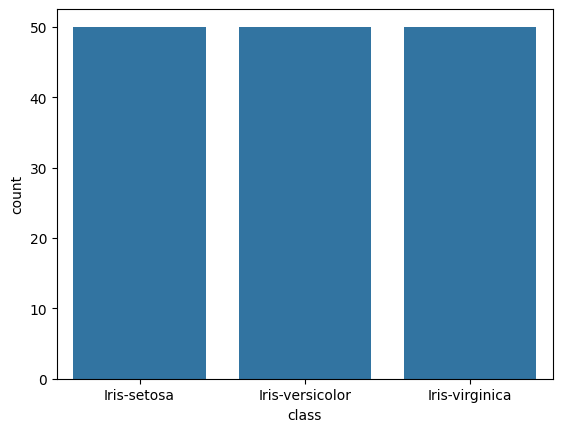

In [16]:
y.value_counts(normalize=True)
sns.countplot(y, x='class')

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y['class'], test_size=0.75, stratify=y['class'])

In [42]:
pipeline = Pipeline([
  ('scale', StandardScaler()),
  ('knn', KNeighborsClassifier())
])

params = {
  'knn__n_neighbors': [3,5,7,9],
  'knn__weights': ['uniform','distance']
}

gridSearch = GridSearchCV(pipeline, params, cv=3)

In [43]:
gridSearch.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7, 9],
                         'knn__weights': ['uniform', 'distance']})

In [44]:
pd.DataFrame(gridSearch.cv_results_)[['param_knn__n_neighbors','param_knn__weights',
                                      'mean_test_score','std_test_score','rank_test_score']].sort_values('rank_test_score')

,param_knn__n_neighbors,param_knn__weights,mean_test_score,std_test_score,rank_test_score
0,3,uniform,0.972222,0.039284,1
1,3,distance,0.972222,0.039284,1
2,5,uniform,0.918803,0.068108,3
3,5,distance,0.918803,0.068108,3
7,9,distance,0.918803,0.003022,3
6,9,uniform,0.893162,0.033240,6
4,7,uniform,0.891026,0.040878,7
5,7,distance,0.891026,0.040878,7


142     Iris-virginica
76     Iris-versicolor
141     Iris-virginica
45         Iris-setosa
53     Iris-versicolor
93     Iris-versicolor
130     Iris-virginica
57     Iris-versicolor
99     Iris-versicolor
43         Iris-setosa
39         Iris-setosa
124     Iris-virginica
32         Iris-setosa
48         Iris-setosa
91     Iris-versicolor
139     Iris-virginica
98     Iris-versicolor
60     Iris-versicolor
127     Iris-virginica
80     Iris-versicolor
22         Iris-setosa
120     Iris-virginica
102     Iris-virginica
15         Iris-setosa
37         Iris-setosa
148     Iris-virginica
125     Iris-virginica
29         Iris-setosa
6          Iris-setosa
69     Iris-versicolor
77     Iris-versicolor
149     Iris-virginica
134     Iris-virginica
84     Iris-versicolor
19         Iris-setosa
116     Iris-virginica
25         Iris-setosa
Name: class, dtype: object

In [50]:
preds = gridSearch.best_estimator_.predict(X_train)
confMatrix = confusion_matrix(y_train, preds)

In [53]:
confMatrix

array([[12,  0,  0],
       [ 0, 11,  1],
       [ 0,  0, 13]])

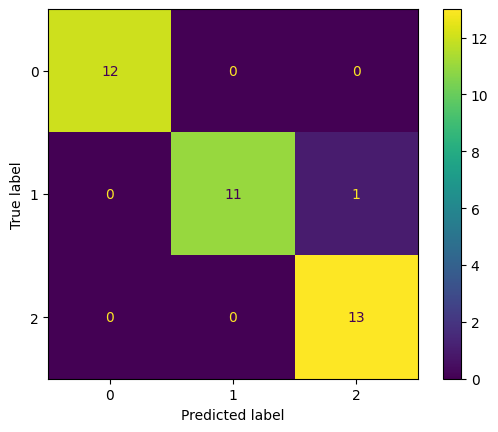

In [54]:
ConfusionMatrixDisplay(confMatrix).plot()
plt.show()